In [106]:
import requests
import json
#import logging
#import http.client
import pandas as pd
import xlwings as xw
from time import sleep
from datetime import datetime,time,timedelta
import os
#import property as p
import numpy as np
import matplotlib.pyplot as plt
#from scipy.interpolate import make_interp_spline, BSplin
import seaborn
import matplotlib.pyplot as plt


pd.set_option("display.width",1500)
pd.set_option("display.max_columns",75)
pd.set_option("display.max_rows",150)
%config Completer.use_jedi = False

In [190]:
def readJson(filename):
    with open(filename,"r") as files:
        data = json.load(files)
    #print(data)
    return data

def findStrikerangeDataframe(df, underlyingvalue , rangeval,rangespace):
    start = (underlyingvalue-underlyingvalue%rangespace)-rangeval
    end = (underlyingvalue-underlyingvalue%rangespace) +rangeval
    strikerang = [*range(start,end,rangespace)]
    atm =underlyingvalue-underlyingvalue%100 
    strikerang.append(atm)
    print(strikerang)
    print(df['Time'].max())
    df1 = df[df['strikePrice'].isin (strikerang)]
    range_df = df1.drop(['Time','askPrice', 'askQty', 'bidQty', 'bidprice','totalBuyQuantity', 'totalSellQuantity','underlying','totalTradedVolume','identifier','underlyingValue','expiryDate'], axis=1)
    return range_df,atm

def drawDiagrams(df1) :
    df1['Prc_chage_prod_OI'] =df1['changeinOpenInterest'] * df1['change']
    all_time_df = df1[(df1['lastPrice']  !=0)   & (df1['impliedVolatility']  !=0) &(df1['strikePrice']  ==atm)  &(df1['type']  =='CE')]
    all_time_df = all_time_df.drop(['askPrice', 'askQty', 'bidQty', 'bidprice','totalBuyQuantity', 'totalSellQuantity','underlying','totalTradedVolume','identifier','underlyingValue','expiryDate'], axis=1)
    all_time_pe_df = df1[(df1['lastPrice']  !=0)   & (df1['impliedVolatility']  !=0) &(df1['strikePrice']  ==atm)  &(df1['type']  =='PE')]
    all_time_pe_df = all_time_pe_df.drop(['askPrice', 'askQty', 'bidQty', 'bidprice','totalBuyQuantity', 'totalSellQuantity','underlying','totalTradedVolume','identifier','underlyingValue','expiryDate'], axis=1)
    
    plt.figure(figsize=(10,10))
    plt.plot(all_time_df['Time'],all_time_df['lastPrice'] ,label ="lastPrice CE")

    plt.plot(all_time_pe_df['Time'],all_time_pe_df['lastPrice'] ,label ="lastPrice PE")
    plt.xlabel("Time")
    plt.ylabel("lastPrice")
    plt.title("option chain ")
    plt.legend(loc="upper left")

    plt.figure(figsize=(10,10))
    plt.plot(all_time_df['Time'],all_time_df['impliedVolatility'] ,label ="IV CE")

    plt.plot(all_time_pe_df['Time'],all_time_pe_df['impliedVolatility'] ,label ="IV PE")
    plt.xlabel("Time")
    plt.ylabel("impliedVolatility")
    plt.title("option chain ")
    plt.legend(loc="upper left")

    plt.figure(figsize=(10,10))
    plt.plot(all_time_df['Time'],all_time_df['changeinOpenInterest'] ,label ="changeinOICE")
    plt.plot(all_time_pe_df['Time'],all_time_pe_df['changeinOpenInterest'] ,label ="changeinOIPE")
    plt.xlabel("Time")
    plt.ylabel("OI")
    plt.title("option chain ")
    plt.legend(loc="upper left")

    plt.figure(figsize=(10,10))
    plt.plot(all_time_df['Time'],all_time_df['Prc_chage_prod_OI'] ,label ="Price_changeinOICE")
    plt.plot(all_time_pe_df['Time'],all_time_pe_df['Prc_chage_prod_OI'] ,label ="PRice_changeinOIPE")
    plt.xlabel("Time")
    plt.ylabel("price_chage and OI change")
    plt.title("option chain ")
    plt.legend(loc="upper left")

[32900, 33000, 33100, 33200, 33300, 33400, 33500, 33600, 33700, 33800, 33900, 34000, 34100, 34200, 34300, 34400, 34500, 34600, 34700, 34800, 33900]
15:18
33900
     change  changeinOpenInterest  impliedVolatility  lastPrice  openInterest    pChange  pchangeinOpenInterest  strikePrice type
67   -53.35                 39338               6.49       2.35         92929 -95.780969              73.404116        34000   CE
195 -492.95                 35467               4.36       0.50         44103 -99.898673             410.687818        33700   PE


<ipython-input-190-59ebaa7cf4dd>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Prc_chage_prod_OI'] =df1['changeinOpenInterest'] * df1['change']


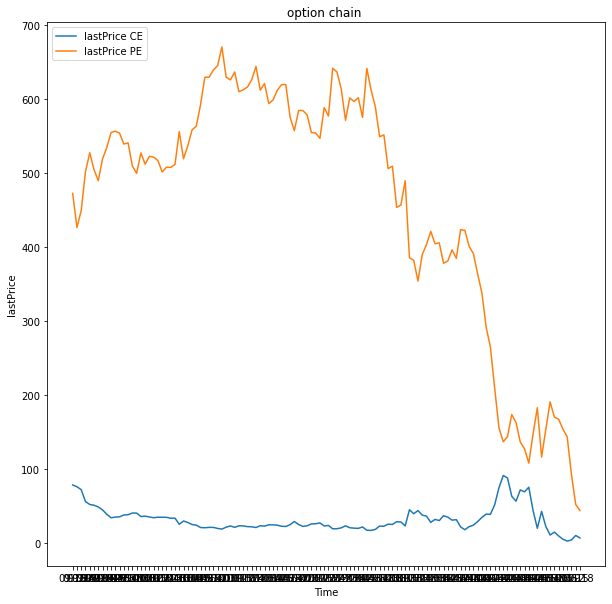

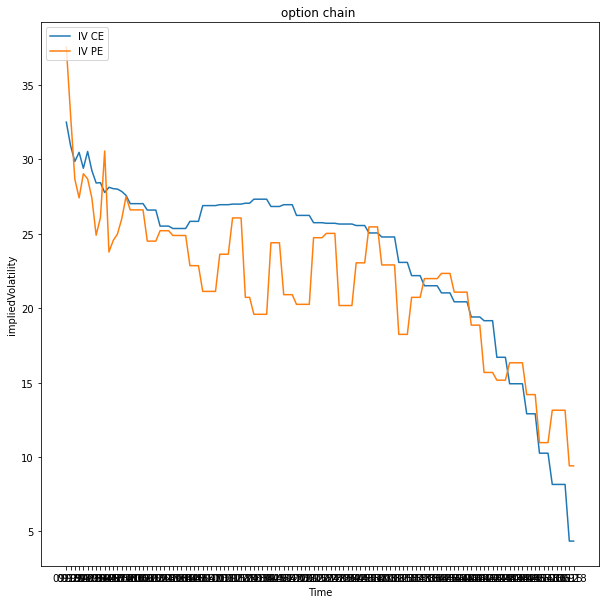

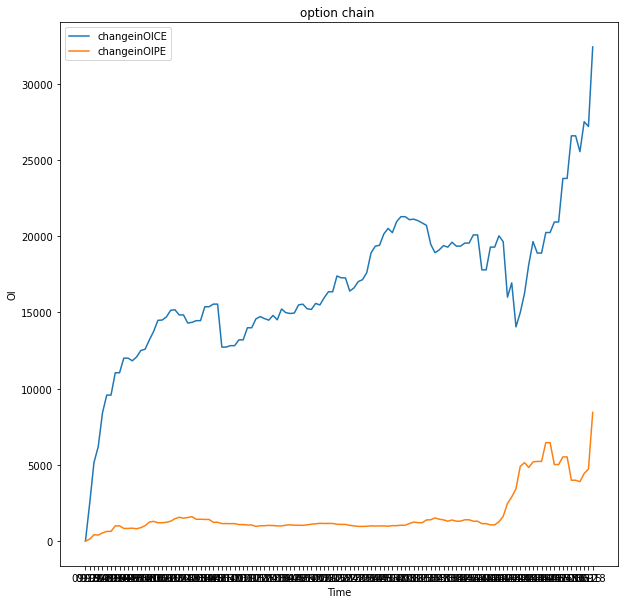

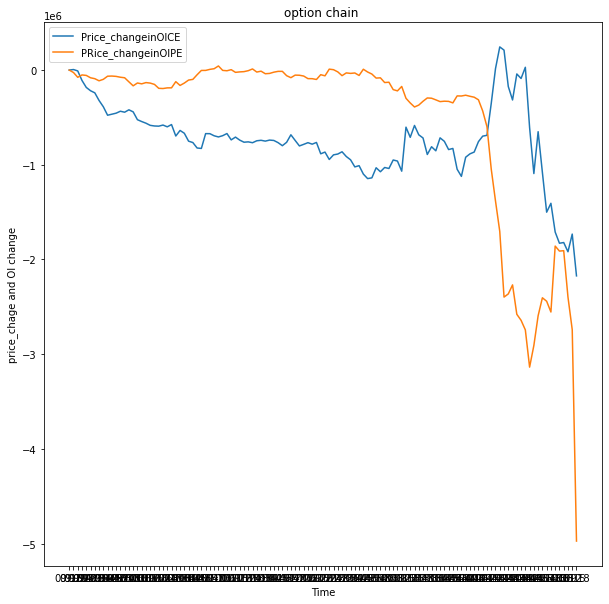

In [197]:
df_list = readJson("oi_data_records_010421.json")
df = pd.DataFrame()
for item in df_list:
    df = pd.concat([df,pd.DataFrame(item)])
#print(df)

df1 = df[df['expiryDate'] == '01-Apr-2021']

df2 = df1[(df1['lastPrice']  !=0)   & (df1['impliedVolatility']  !=0) & (df1['Time']== df1['Time'].max())]

#print(df2['type'].unique())

#print(int(df2['underlyingValue'].unique()[0]))

range_df, atm = findStrikerangeDataframe(df2,int(df2['underlyingValue'].unique()[0]),1000,100)
print(atm)

newdf =(range_df.groupby('type')['changeinOpenInterest'].nlargest(1).reset_index().rename(columns = {'level_1':'n'}) )
larget_oi_df = (range_df[range_df.index.isin(newdf['n'])])
print(larget_oi_df)
#print(range_df[range_df['changeinOpenInterest']== 28552])
#print(range_df.loc[[62]])

#print(int(df2['underlyingValue'].unique()[0]))
#int(df2['underlyingValue'].unique()[0])%500
drawDiagrams(df1)

In [85]:
df.shape

(1460, 21)

In [97]:
df2.columns

Index(['Time', 'askPrice', 'askQty', 'bidQty', 'bidprice', 'change', 'changeinOpenInterest', 'expiryDate', 'identifier', 'impliedVolatility', 'lastPrice', 'openInterest', 'pChange', 'pchangeinOpenInterest', 'strikePrice', 'totalBuyQuantity', 'totalSellQuantity', 'totalTradedVolume', 'type', 'underlying', 'underlyingValue'], dtype='object')

In [192]:
ce_otm_df = larget_oi_df[(larget_oi_df['strikePrice']>atm) &  (larget_oi_df['type']=='CE')]
ce_itm_df = larget_oi_df[(larget_oi_df['strikePrice']<=atm) &  (larget_oi_df['type']=='CE')]
pe_otm_df = larget_oi_df[(larget_oi_df['strikePrice']<atm) &  (larget_oi_df['type']=='PE')]
pe_itm_df = larget_oi_df[(larget_oi_df['strikePrice']>=atm) &  (larget_oi_df['type']=='PE')]
print(ce_otm_df)
print(ce_itm_df)
print(pe_otm_df)
print(pe_itm_df)


    change  changeinOpenInterest  impliedVolatility  lastPrice  openInterest    pChange  pchangeinOpenInterest  strikePrice type
67  -50.45                 44300               9.89       5.25         97891 -90.574506              82.663134        34000   CE
Empty DataFrame
Columns: [change, changeinOpenInterest, impliedVolatility, lastPrice, openInterest, pChange, pchangeinOpenInterest, strikePrice, type]
Index: []
     change  changeinOpenInterest  impliedVolatility  lastPrice  openInterest    pChange  pchangeinOpenInterest  strikePrice type
193 -358.25                 39638              11.29        4.7         62986 -98.705056              169.77043        33500   PE
Empty DataFrame
Columns: [change, changeinOpenInterest, impliedVolatility, lastPrice, openInterest, pChange, pchangeinOpenInterest, strikePrice, type]
Index: []


In [98]:
##df2 = df1.groupby(['Time','underlyingValue'])[['change', 'changeinOpenInterest', 'expiryDate']].size().reset_index().rename(columns = {0:'count'})
